In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [3]:
cow_df = pd.read_csv("/Users/revan/Downloads/NMC_5_0.csv")
cow_df.head()

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039697,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011


In [4]:
cow_df = cow_df[~cow_df.eq(-9).any(1)]

In [5]:
#Question 3: Focusing only the year 2012 and creating a new data set that has no missing values or -9
cow_df2 = cow_df[(cow_df['year'] == 2012)]
cow_df2.head()

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
196,USA,2,2012,655388000,1569,88695,3159873,317505.0,183712.0,0.139353,2011
289,CAN,20,2012,18445000,66,13507,343023,34838.0,20647.0,0.009155,2011
329,BHM,31,2012,55000,1,0,261,372.0,0.0,0.000025,2011
686,DOM,42,2012,363000,25,0,7352,10277.0,3293.0,0.000810,2011
737,JAM,51,2012,139000,3,0,2512,2769.0,586.0,0.000172,2011


In [6]:
#Prints top 10 cinc 
cow_df2 = cow_df2.sort_values('cinc', ascending=False)
cow_df2.head(10)

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
13141,CHN,710,2012,102643000,2285,731040,5333707,1377065.0,440254.0,0.218117,2011
196,USA,2,2012,655388000,1569,88695,3159873,317505.0,183712.0,0.139353,2011
13658,IND,750,2012,33404000,1325,77264,1385461,1236687.0,223768.0,0.080899,2011
7863,RUS,365,2012,58765000,956,70209,1356742,143170.0,53585.0,0.040079,2011
13592,JPN,740,2012,59077000,248,107232,737482,127250.0,86437.0,0.035588,2011
2929,BRA,140,2012,35266000,318,34524,345842,198656.0,94199.0,0.025063,2011
13445,ROK,732,2012,29256000,655,69073,444461,49003.0,32959.0,0.023212,2011
5572,GMY,255,2012,40994000,251,42661,468740,82800.0,15605.0,0.017910,2011
11720,IRN,630,2012,25249000,523,14463,397332,76424.0,28265.0,0.015762,2011
3930,UKG,200,2012,61274000,174,9579,315502,62783.0,28933.0,0.015277,2011


In [7]:
top10 = cow_df2['stateabb'].head(10).tolist()
top10_df = cow_df[cow_df['stateabb'].isin(top10)][['stateabb', 'cinc', 'year']]
#print(top10)
top10_df.head(10)

,stateabb,cinc,year
0,USA,0.039697,1816
1,USA,0.035817,1817
2,USA,0.036126,1818
3,USA,0.037133,1819
4,USA,0.037087,1820
5,USA,0.034173,1821
6,USA,0.032939,1822
7,USA,0.033107,1823
8,USA,0.032978,1824
9,USA,0.034215,1825


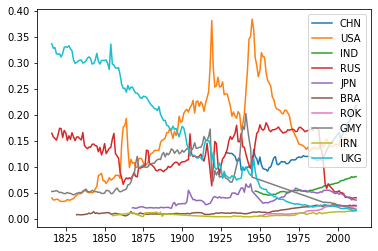

In [8]:
#Question 3
#Line graph of the cinc values for the top 10 countries over time from 1816 to 2012
for country in top10:
    cinc = cow_df[cow_df['stateabb'] == country][['cinc', 'year']]
    plt.plot(cinc.set_index('year'))
    
plt.legend(top10, loc=1)

<AxesSubplot:xlabel='year'>

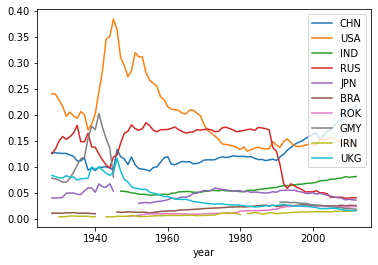

In [9]:
#Line graph of the cinc values for the top 10 countries over time from 1920s to 2012
cincdf = pd.DataFrame()
for country in top10:
    cincdf[country] = cow_df[cow_df['stateabb'] == country][['cinc', 'year']].set_index('year')

cincdf.plot()

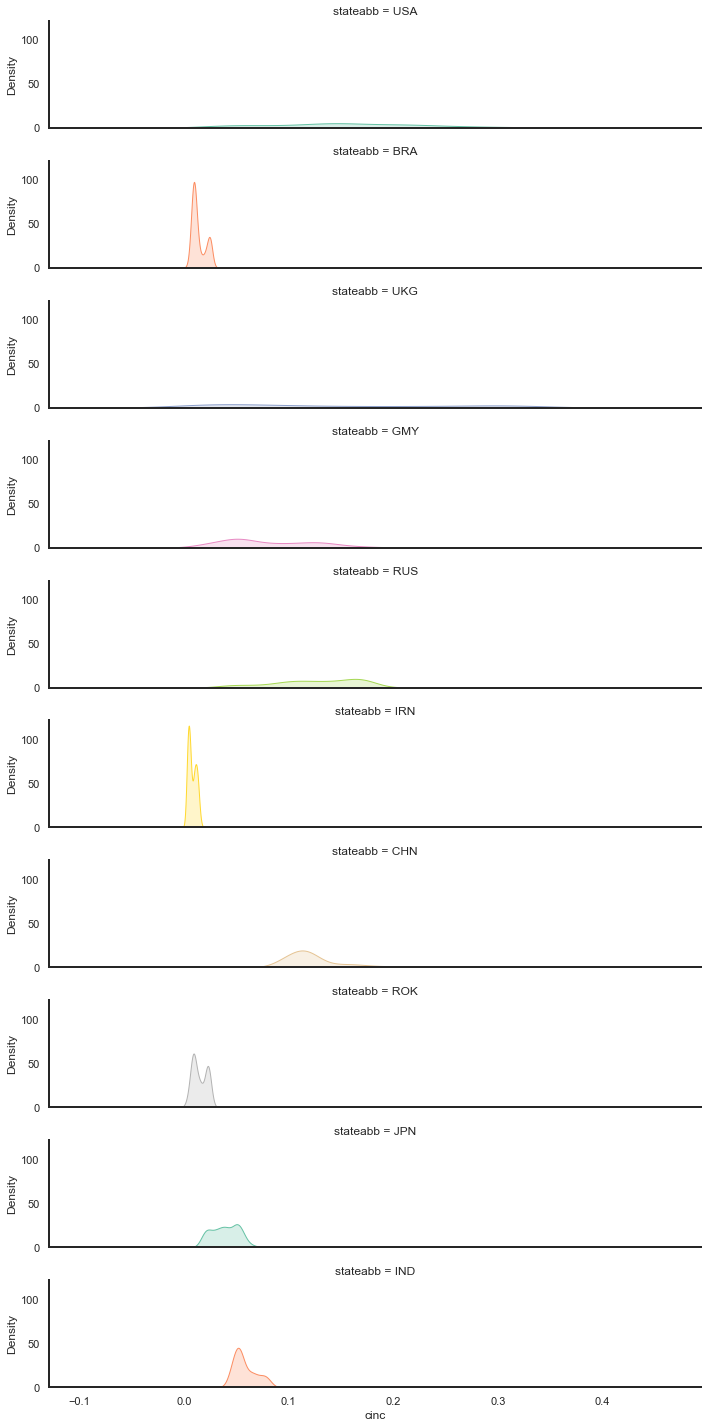

In [10]:
#Question 4 
#Ridgeline series of the most capable countries.
ridge_df = cow_df[cow_df['stateabb'].isin(top10)][['stateabb','cinc']]

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(ridge_df, palette=palette, row="stateabb", hue="stateabb", aspect=5, height=2.0)
#g = sns.FacetGrid(ridge_df, row="stateabb", aspect=9, height=1.5)
g.map_dataframe(sns.kdeplot, x="cinc", fill=True)

<AxesSubplot:>

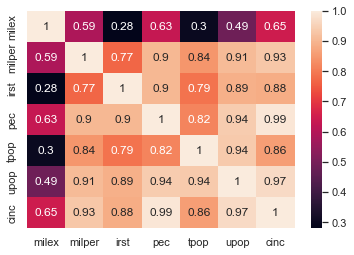

In [11]:
#Question 5
cow_df3 = cow_df[(cow_df['year'] == 2012)]
corr_df = cow_df3[['milex', 'milper', 'irst', 'pec','tpop' ,'upop','cinc']]
#corr_df.head() 
sns.heatmap(corr_df.corr(), annot=True)

In [42]:
#Question 6
#Standardizing the variable
normalized_df = (corr_df-corr_df.min())/(corr_df.max()-corr_df.min())
countries = cow_df3['stateabb'].tolist()
normalized_df['stateabb'] = cow_df3['stateabb']
normalized_df.set_index('stateabb', inplace=True)
normalized_df.head()

,milex,milper,irst,pec,tpop,upop,cinc
stateabb,,,,,,,
USA,1.000000,0.686652,0.121327,0.592435,0.230561,0.417286,0.638890
CAN,0.028144,0.028884,0.018476,0.064312,0.025292,0.046898,0.041973
BHM,0.000084,0.000438,0.000000,0.000049,0.000263,0.000000,0.000113
DOM,0.000554,0.010941,0.000000,0.001378,0.007456,0.007480,0.003712
JAM,0.000212,0.001313,0.000000,0.000471,0.002004,0.001331,0.000787


In [61]:
#Euclidean
euclidean = pd.DataFrame(
    squareform(pdist(normalized_df.loc[countries]) , 'euclidean'),
    columns = countries,
    index = countries
)

long_form1 = euclidean.unstack()
long_form1.index.rename(['Country A', 'Country B'], inplace=True)
long_form1 = long_form1.to_frame('euclidean distance').reset_index()
long_form1 = long_form1[long_form1['Country A'] < long_form1['Country B']]
long_form1.sort_values('euclidean distance').head(20)

,Country A,Country B,euclidean distance
27544,NAU,TUV,3.820816e-07
27564,MSI,SKN,2.243880e-06
26874,KIR,TON,3.001378e-06
6590,LIE,MNC,3.127367e-06
1354,GRN,SVG,3.792130e-06
1842,SVG,TON,3.901145e-06
6603,LIE,SNM,4.770614e-06
1506,GRN,TON,4.968829e-06
6435,MNC,SNM,5.269978e-06
1679,SLU,WSM,6.243583e-06


In [91]:
#Manhattan
manhattan = pd.DataFrame(
    squareform(pdist(normalized_df.loc[countries]) , 'cityblock'),
    columns = countries,
    index = countries
)

long_form2 = manhattan.unstack()
long_form2.index.rename(['Country A', 'Country B'], inplace=True)
long_form2 = long_form2.to_frame('Manhattan distance').reset_index()
long_form2 = long_form2[long_form2['Country A'] < long_form2['Country B']]
long_form2.sort_values('Manhattan distance').head(20)

,Country A,Country B,Manhattan distance
27544,NAU,TUV,3.820816e-07
27564,MSI,SKN,2.243880e-06
26874,KIR,TON,3.001378e-06
6590,LIE,MNC,3.127367e-06
1354,GRN,SVG,3.792130e-06
1842,SVG,TON,3.901145e-06
6603,LIE,SNM,4.770614e-06
1506,GRN,TON,4.968829e-06
6435,MNC,SNM,5.269978e-06
1679,SLU,WSM,6.243583e-06


In [92]:
#QUESTION 7
cinc_df = cow_df[(cow_df['year'] == 2012)][['stateabb','cinc']]
cinc_dict = cinc_df.set_index('stateabb').to_dict()['cinc']
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world['cinc'] = world['iso_a3'].map(cinc_dict)

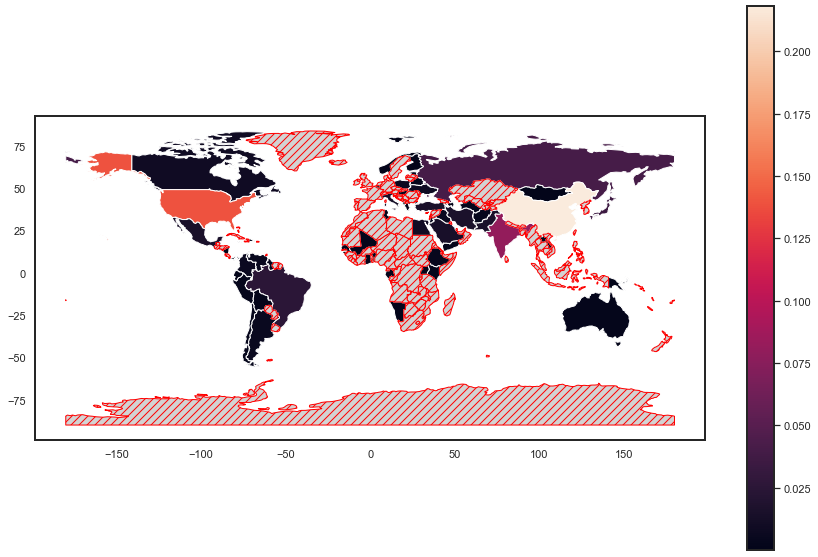

In [93]:
#world.plot(column='cinc', cmap='OrRd', legend=True)


world.plot(
    column="cinc",
    legend=True,
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);